<a href="https://colab.research.google.com/github/ManelGH1167/MasterIA/blob/main/Examen_C1_Manel_Gonzalez_Huete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EXAMEN - Convocatoria 1 - Programación
Utilizar el conjunto de datos "dataset_exam.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

Nombre: Manel González Huete

https://colab.research.google.com/drive/10ywbP9as88Ax2lcBT5U8Ub4B3E5zEw-t#scrollTo=2R-_C_sCu1uZ

https://github.com/ManelGH1167/MasterIA/blob/main/Examen_C1_Manel_Gonzalez_Huete.ipynb

#### 1) Partición de datos externa (1 punto)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).
Comprobad si los datos, tanto de train como de test, están más o menos balanceados.

In [7]:
import os
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.preprocessing     import StandardScaler
from sklearn.feature_selection import SelectPercentile, mutual_info_classif
from sklearn.model_selection   import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [9]:
# Cargamos los datos
data = np.load('/content/dataset_exam.npy', allow_pickle=True)

In [10]:
#Deminimos una semilla para usarla en el resto del código
semilla=42

data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=semilla) # hold-out

# Estraemos los atributos (x) y la etiqueta (y)
datos_train_X = data_train[:,:-1]
datos_train_y = data_train[:, -1]

datos_test_X = data_test[:,:-1]
datos_test_y = data_test[:, -1]

print(np.shape(datos_train_X))
print(np.shape(datos_train_y))
print(np.shape(datos_test_X))
print(np.shape(datos_test_y))

(393, 8)
(393,)
(99, 8)
(99,)


In [11]:
#Validamos el balanceo de train y de test.
val_train , num_train= np.unique(datos_train_y, return_counts=True)
val_test , num_test = np.unique(datos_test_y, return_counts=True)

print('[INFO] --- TRAIN --- \nValores: ', val_train, '\nNegativo: ', num_train[0], '\nPositivo: ', num_train[1])
print('[INFO] --- TEST --- \nValores: ', val_test, '\nNegativo: ', num_train[0], '\nPositivo: ', num_test[1])

[INFO] --- TRAIN --- 
Valores:  [0. 1.] 
Negativo:  195 
Positivo:  198
[INFO] --- TEST --- 
Valores:  [0. 1.] 
Negativo:  195 
Positivo:  48


Vemos que la **etiqueta es binaria**, no se trata de un problema multiclase

**Se valida que están relativamente bien balanceados**

#### 2) Estandarización de los datos de train y test (1 punto)
Utilizar el método StandardScaler().

In [12]:
# Realizamos el proceso de estandarización de los datos de "train"
estandarizar = StandardScaler()
datos_standard = estandarizar.fit(datos_train_X)
datos_train_X = datos_standard.transform(datos_train_X)
datos_test_X  = datos_standard.transform(datos_test_X)
print("[INFO] --- TRAIN --- ")
print(datos_train_X[:5])
print("[INFO] --- TEST --- ")
print(datos_test_X[:5])

[INFO] --- TRAIN --- 
[[-0.53714485 -0.41701989 -0.37232487 -0.42469918  0.88784615 -0.54017298
  -1.96779643 -2.17643457]
 [ 1.86169522 -0.41701989 -1.25913502  0.31710872  0.88784615  0.33529217
   0.47045818  0.57704227]
 [-0.53714485  0.63354944 -0.37232487 -1.16650709  1.78252188 -2.29090328
  -0.78155436 -2.19168937]
 [ 1.86169522  0.63354944 -1.25913502  0.31710872  0.88784615 -2.1946854
  -0.70088243 -2.11512786]
 [-0.53714485 -1.46758922  0.51448528  0.31710872 -0.90150532  0.45491681
   0.15483585  0.27805077]]
[INFO] --- TEST --- 
[[-0.53714485  0.63354944 -0.37232487 -1.908315    2.67719761  0.05934713
   0.34463955 -0.04781824]
 [-0.53714485 -0.41701989  2.28810557 -0.42469918 -1.79618105  0.73631258
   0.52701466  0.66320258]
 [ 1.86169522  0.63354944 -0.37232487  0.31710872 -0.00682959 -0.28406237
   0.31670305  0.46205349]
 [-0.53714485  0.63354944 -0.37232487  1.05891663 -0.90150532 -0.59020263
   0.70077578  0.46205349]
 [-0.53714485 -0.41701989  1.40129542 -0.4246991

#### 3) Selección de atributos en train y test (1 punto)
Aplicar el método de mutual information para clasificación seleccionando un percentile=90. (Recordad la función "SelectPercentile")

In [13]:
# Crear el selector con mutual information para clasificación seleccionando un percentile=90
selector = SelectPercentile(score_func=mutual_info_classif, percentile=90)

# Ajustar el selector con los datos de train
selector.fit(datos_train_X, datos_train_y)

# Transformar las X de train con las mejores características
datos_train_X_selected = selector.transform(datos_train_X)
datos_test_X_selected = selector.transform(datos_test_X)

# Mostrar la nueva forma de los atributos tras la selección realizada
print("[INFO] --- TRAIN --- Forma original de los 'atributos':", datos_train_X.shape)
print("[INFO] --- TRAIN --- Forma de 'atributos' después de la selección:", datos_train_X_selected.shape)
print("[INFO] --- TEST --- Forma original de los 'atributos':", datos_test_X.shape)
print("[INFO] --- TEST --- Forma de 'atributos' después de la selección:", datos_test_X_selected.shape)


[INFO] --- TRAIN --- Forma original de los 'atributos': (393, 8)
[INFO] --- TRAIN --- Forma de 'atributos' después de la selección: (393, 7)
[INFO] --- TEST --- Forma original de los 'atributos': (99, 8)
[INFO] --- TEST --- Forma de 'atributos' después de la selección: (99, 7)


#### 4) Comparación de modelos de clasificación mediante validación cruzada (3 puntos)
Instrucciones:

- Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión Logística y Support Vector Machine.
- La optimización de hiperparámetros debe realizarse de manera automática. (Recordad la función "GridSearchCV").
- La comparación debe realizarse únicamente en términos de exactitud proporcionando resultados de media +- desviación estándar.

In [14]:
# Definición de los algoritmos de clasificación a utilizar
algoritmos = {'LOGR': LogisticRegression(penalty='l2', solver='saga', max_iter=1000, random_state=semilla),
              'SVM': svm.SVC(C=10, random_state=semilla, probability=True),
              'DT': tree.DecisionTreeClassifier(criterion='gini', random_state=semilla)}

# Cross-validation interno en k=5 bolsas
results={}
for nombre, algoritmo in algoritmos.items():
    results[nombre] = cross_val_score(algoritmo, datos_train_X_selected, datos_train_y, cv=KFold(n_splits=5, shuffle=True, random_state=semilla))
    print("[INFO] ---",nombre + ': Accuracy: %0.4f +/- %0.4f' % (results[nombre].mean(), results[nombre].std()))

[INFO] --- LOGR: Accuracy: 0.6740 +/- 0.0710
[INFO] --- SVM: Accuracy: 0.7964 +/- 0.0170
[INFO] --- DT: Accuracy: 0.9771 +/- 0.0235


En el ejercicio solicitaba los modelos: Regresión Logística y Support Vector Machine. Me he permitido la licencia de incluir un árbol de decisión para ver cómo se trabajaría conjuntamente, aunque para la resolución del examen me centraré exclusivamente en los modelos: **Regresión Logística y Support Vector Machine.**

In [15]:
# Definir los modelos base
algoritmos = {'LOGR':LogisticRegression(random_state=semilla),
              'SVM': svm.SVC(random_state=semilla),
              'DT' : tree.DecisionTreeClassifier(random_state=semilla)}

# Definir los hiperparámetros a probar para cada modelo
param_grid = {
    'LOGR': {
        'penalty': ['l1', 'l2'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100,500,1000,5000,10000],
    },
    'SVM': {
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf','poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'coef0': [0.0001, 0.001, 0.01, 0.1, 1, 2],
        'decision_function_shape': ['ovo', 'ovr'],
        'probability': [True, False]
    },
    'DT': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [2, 3, 5, 6, 8],
        'max_features': ['sqrt', 'log2', None],
        'min_weight_fraction_leaf': [0.00, 0.01, 0.05, 0.1, 0.5]
    }
}

# Guardar los mejores modelos
best_models = {}
cv=KFold(n_splits=5, shuffle=True, random_state=semilla)   # Definir la validación cruzada en k=5 bolsas

# Optimización con GridSearchCV
for nombre, modelo in algoritmos.items():
    print(f"[INFO] Optimizando {nombre}...")

    # Configurar GridSearchCV
    grid_search = GridSearchCV(
        modelo,
        param_grid[nombre],
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )

    # Ajustar el modelo con GridSearchCV
    grid_search.fit(datos_train_X_selected, datos_train_y)

    # Guardar el mejor modelo
    best_models[nombre] = grid_search.best_estimator_

    print(f"[INFO] Mejor configuración para {nombre}: {grid_search.best_params_}")

[INFO] Optimizando LOGR...
[INFO] Mejor configuración para LOGR: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
[INFO] Optimizando SVM...
[INFO] Mejor configuración para SVM: {'C': 10, 'coef0': 2, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly', 'probability': True}
[INFO] Optimizando DT...
[INFO] Mejor configuración para DT: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_weight_fraction_leaf': 0.01, 'splitter': 'best'}


Vemos que la mejora configuración para SVM tiene el parámetro **probability = "True"**, parámetro que es necesario posteriormente para la curva ROC ya que se necesitan probabilidades en lugar de solo etiquetas (0 o 1) que es lo que devuelve SVC al usar .predict()

In [16]:
# Comparación de modelos con cross-validation
results = {}
print("\n=== Comparación de Modelos ===")
for nombre, modelo in best_models.items():
    scores = cross_val_score(modelo, datos_train_X_selected, datos_train_y, cv=cv, scoring='accuracy')
    results[nombre] = scores
    print(f"[INFO] --- {nombre}: Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")


=== Comparación de Modelos ===
[INFO] --- LOGR: Accuracy = 0.6971 ± 0.0322
[INFO] --- SVM: Accuracy = 0.8651 ± 0.0430
[INFO] --- DT: Accuracy = 0.9796 ± 0.0192


#### 5) Evaluación de los modelos sobre el conjunto de test (2.5 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test mostrando una tabla de resultados tal que:
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LOGR y SVM

In [17]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='macro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='macro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='macro'),
  'AUC':    lambda y_true, y_pred:
            metrics.roc_auc_score(y_true, y_pred, average='macro') }

resultados_train = {}
resultados_test = {}
predicciones_test = {}  # Guardaremos las predicciones para su uso posterior
# Entrenar los mejores modelos encontrados en GridSearchCV con todos los datos de entrenamiento
for nombre, modelo in best_models.items():
    print(f"[INFO] --- Entrenando algoritmo final: {nombre}...")

    # Entrenar con todos los datos de entrenamiento
    modelo_final = modelo.fit(datos_train_X_selected, datos_train_y)

    # Hacer predicciones en train -------------
    predicciones_train = modelo_final.predict(datos_train_X_selected)
    # Hacer predicciones en test -------------
    predicciones_test[nombre] = modelo_final.predict(datos_test_X_selected)

    res_train = {}
    res_test = {}
    # Calcular métricas y guardar en diccionario
    for nombre_metrica, metrica in metricas.items():
        res_train[nombre_metrica] = metrica(datos_train_y, predicciones_train)
        res_test[nombre_metrica] = metrica(datos_test_y,predicciones_test[nombre])

    # Guardar métricas de train en el diccionario
    resultados_train[nombre] =  res_train
    # Guardar métricas de test en el diccionario
    resultados_test[nombre] =  res_test

print("[INFO] --- Entrenamiento completado para todos los algoritmos.")

tabla_resultados = pd.DataFrame(resultados_train)  # Transponer para mejor formato

# Mostrar tabla
print("\n=== Resultados finales con datos de Entrenamiento ===")
print(tabla_resultados)

tabla_resultados = pd.DataFrame(resultados_test)  # Transponer para mejor formato

# Mostrar tabla
print("\n=== Resultados finales con datos de TEST ===")
print(tabla_resultados)

[INFO] --- Entrenando algoritmo final: LOGR...
[INFO] --- Entrenando algoritmo final: SVM...
[INFO] --- Entrenando algoritmo final: DT...
[INFO] --- Entrenamiento completado para todos los algoritmos.

=== Resultados finales con datos de Entrenamiento ===
            LOGR       SVM        DT
ACC     0.730280  0.936387  0.994911
PREC    0.731824  0.938111  0.995000
RECALL  0.730575  0.936636  0.994872
F1      0.729984  0.936346  0.994910
AUC     0.730575  0.936636  0.994872

=== Resultados finales con datos de TEST ===
            LOGR       SVM        DT
ACC     0.666667  0.818182  0.959596
PREC    0.670455  0.820455  0.961538
RECALL  0.668505  0.816789  0.960784
F1      0.666122  0.817268  0.959592
AUC     0.668505  0.816789  0.960784


#### 6) Visualización de resultados (1 punto)
- Mostrar la matriz de confusión
- Mostrar en una única figura la comparación de las curvas ROC obtenidas por cada modelo. (Recordad que SVM requiere un parámetro específico en su llamada para poder calcular la curva ROC).

[INFO] Evaluando el modelo: LOGR...
Matriz de confusión para LOGR:
[[31 20]
 [13 35]]

[INFO] Evaluando el modelo: SVM...
Matriz de confusión para SVM:
[[44  7]
 [11 37]]

[INFO] Evaluando el modelo: DT...
Matriz de confusión para DT:
[[47  4]
 [ 0 48]]



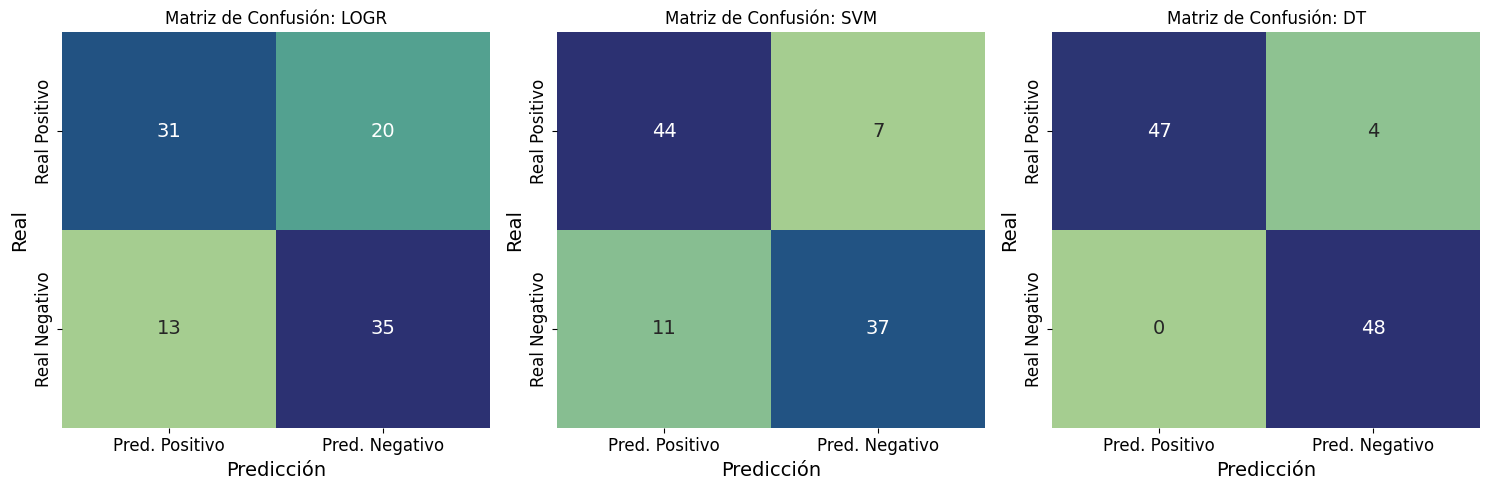

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para las matrices de confusión
plt.figure(figsize=(15, 5))

for i, (nombre, modelo) in enumerate(best_models.items(), 1):
    print(f"[INFO] Evaluando el modelo: {nombre}...")

    # Generar la matriz de confusión
    cm = metrics.confusion_matrix(datos_test_y, predicciones_test[nombre])

    # Extraemos la matriz de confusión
    print(f"Matriz de confusión para {nombre}:\n{cm}\n")

    # Crear una subfigura para cada modelo
    plt.subplot(1, len(best_models), i)
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap="crest", cbar=False,
                xticklabels=['Pred. Positivo','Pred. Negativo'],
                yticklabels=['Real Positivo','Real Negativo'],
                annot_kws={"size": 14})  # Asegurar celdas cuadradas

    # Ajustar el tamaño del texto de los ejes
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)  # Tamaño de etiquetas en eje X
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Tamaño de etiquetas en eje Y
    plt.title(f'Matriz de Confusión: {nombre}')
    plt.xlabel('Predicción', fontsize=14)
    plt.ylabel('Real', fontsize=14)

plt.tight_layout()
plt.show()

[INFO] Calculando la curva ROC para LOGR...
[INFO] Calculando la curva ROC para SVM...
[INFO] Calculando la curva ROC para DT...


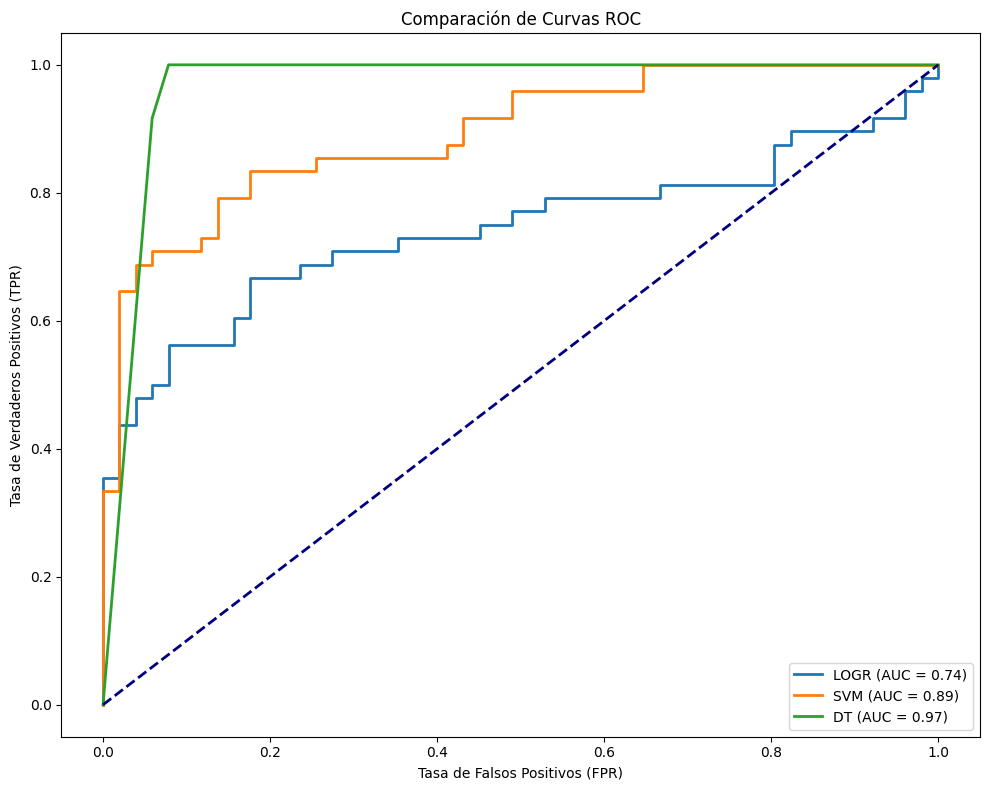

In [19]:
from sklearn.metrics import roc_curve, auc

# Crear una figura para las curvas ROC
plt.figure(figsize=(10, 8))

# Iterar sobre los modelos para graficar sus curvas ROC
for nombre, modelo in best_models.items():
    print(f"[INFO] Calculando la curva ROC para {nombre}...")

    # Obtener las probabilidades de predicción (necesarias para la curva ROC)
    probas = modelo.predict_proba(datos_test_X_selected)[:, 1]  # Probabilidades de la clase positiva

    # Calcular la curva ROC
    fpr, tpr, _ = metrics.roc_curve(datos_test_y, probas)
    roc_auc = metrics.roc_auc_score(datos_test_y, probas, average='macro')

    # Graficar la curva ROC
    plt.plot(fpr, tpr, lw=2, label=f'{nombre} (AUC = {roc_auc:.2f})')

# Graficar la diagonal (representa un clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Personalizar la gráfica
plt.title('Comparación de Curvas ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')

# Mostrar la figura
plt.tight_layout()
plt.show()

Al entrenar los modelos ya vimos que para SVM se establecía el parámetro **probability = "True"**, parámetro que es necesario para la curva ROC ya que se necesitan probabilidades en lugar de solo etiquetas (0 o 1) que es lo que devuelve SVC al usar .predict()

#### 7) Interpretación de resultados (0.5 puntos)
* Justifica brevemente cuál de los dos modelos utilizarías para ponerlo en producción

En el examen solicitaba los modelos: Regresión Logística y Support Vector Machine. El árbol de decisión lo incluido únicamente a nivel experimental, pero la resolución del examen me centraré exclusivamente en los modelos: **Regresión Logística y Support Vector Machine.**

De los modelos: Regresión Logística y Support Vector Machine, el que pondría en producción es el SVM. Aunque uno de sus inconvenientes es el coste computacional, en volúmenenes elevados de datos, en éste no parece que sea el caso, el volumen de registros y atributos es reducido. Por otro lado como se ve en la curva ROC la del SVM y área AUC son mucho mejores a las de LOGR. Adicionalmente **todas** las metricas el modelo SVM son muy superiores a las del LOGR, tanto Precisión (0.820 vs 0.670), como Exactitud (0.818 vs 0.666), como F1 (0.817 vs 0.666) ... Sobretodo sobresale en los falsos negativos que SVM tiene 7 contra los 20 de LOGR.

SVM ha pertido solventar algún problema de solape de las etiquetas, pues al utilizar el algoritmo sin el parámetro "C" el Accuracy fue de 0.791 frente a los 0.816 con un "C=10"

Si por el contrario el entorno que se ha de poner en producción requiere gran rapidez, simplicidad y muy alta escalabilidad, pues se supone que el volumen de datos crecerá mucho (y no se requiere un exactitud muy elevada), la regresión logística sería la mejor opción. Si como hemos presentado el entorno requiere mayor precisión, no crecerá el volumen de datos y éstos serán complejos, SVM sería el seleccionado, siendo conscientes del mayor tiempo de entrenamiento y posiblemente mayor consumo de recursos.

----------

Como añadido, al introducir los árboles de decisión, parece que éstos obtienen unos valores en las métricas y curva ROC superiores a cualquier otro de los modelos anteriores. Habría que analizar si se ha producido algun "sobreajuste" aunque al utilizar y comprobar las métricas obtenidas con los datos de training y los de test no parece que se produzca dicho "sobreajuste"